In [1]:
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.integrate import simpson
from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt
import tkinter.filedialog as tkf
import hyperspy.api as hys
import tifffile
from scipy import ndimage
import ipywidgets as pyw
plt.rcParams['font.family'] = 'Times New Roman'
color_rep = ["black", "orange", "purple", "blue", "red", "green", "yellow", "lime", 
             "cyan", "magenta", "lightgray", "peru", "springgreen", "deepskyblue", 
             "hotpink", "darkgray"]

In [8]:
s = np.array([0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.5,0.6,0.7,0.8,0.9,1,1.2,1.4,1.6,1.8,2,2.5,3,4,6])
B_AF = np.array([4.420007125,4.17476802,3.562240581,2.837929736,2.182057711,1.661922679,1.274102699,0.99236289,0.788187077,0.528119561,0.379835451,0.288583691,0.2281294,0.187066108,0.155127992,0.1140647,0.086689172,0.06843882,0.054751056,0.04562588,0.029656822,0.020531646,0.01140647,0.005703235])
C_AF = np.array([3.921544386,3.761853806,3.35350218,2.827663913,2.30410694,1.84784814,1.477137865,1.18627288,0.961565421,0.655872025,0.471087211,0.354741217,0.277177221,0.224707459,0.185925461,0.134596346,0.101517583,0.07984529,0.065016879,0.053610409,0.035360057,0.025094234,0.013687764,0.006843882])
N_AF = np.array([3.497223702,3.38772159,3.103700487,2.718161801,2.308669528,1.925412136,1.593483859,1.317447285,1.092739826,0.767655431,0.55891703,0.42203939,0.329646983,0.264630104,0.217863577,0.156268639,0.117486641,0.092392407,0.074142055,0.061594938,0.041063292,0.028516175,0.015969058,0.006843882])
O_AF = np.array([3.14818572,3.070621724,2.865305264,2.576721573,2.255059119,1.937959253,1.649375562,1.397292575,1.185132233,0.860047838,0.63876232,0.487056269,0.382116745,0.306834043,0.252082987,0.179081579,0.134596346,0.104939524,0.084407878,0.069579467,0.04562588,0.033078763,0.018250352,0.007984529])

In [ ]:
B_AF_sqr = tifffile.imread("./setting/AFFs_300keV/05_Boron_300keV_fs_square_0.005A.tif").squeeze()
B_AF = np.sqrt(B_AF_sqr)
B_AF /= np.max(B_AF)
C_AF_sqr = tifffile.imread("./setting/AFFs_300keV/06_Carbon_300keV_fs_square_0.005A.tif").squeeze()
C_AF = np.sqrt(C_AF_sqr)
C_AF /= np.max(C_AF)
N_AF_sqr = tifffile.imread("./setting/AFFs_300keV/07_Nitrogen_300keV_fs_square_0.005A.tif").squeeze()
N_AF = np.sqrt(N_AF_sqr)
N_AF /= np.max(N_AF)
O_AF_sqr = tifffile.imread("./setting/AFFs_300keV/08_Oxygen_300keV_fs_square_0.005A.tif").squeeze()
O_AF = np.sqrt(O_AF_sqr)
O_AF /= np.max(O_AF)

k_scale = 0.005 # Angstrom
s = np.arange(0, k_scale*len(B_AF), k_scale)
print(len(s))

In [12]:
composition = [[0.0, 0.9, 0.07, 0.03], [0.0, 0.8, 0.15, 0.05], [0.0, 0.7, 0.2, 0.1], [0.0, 0.6, 0.3, 0.1]]

In [ ]:
%matplotlib inline

In [14]:
%matplotlib widget

In [15]:
%matplotlib qt

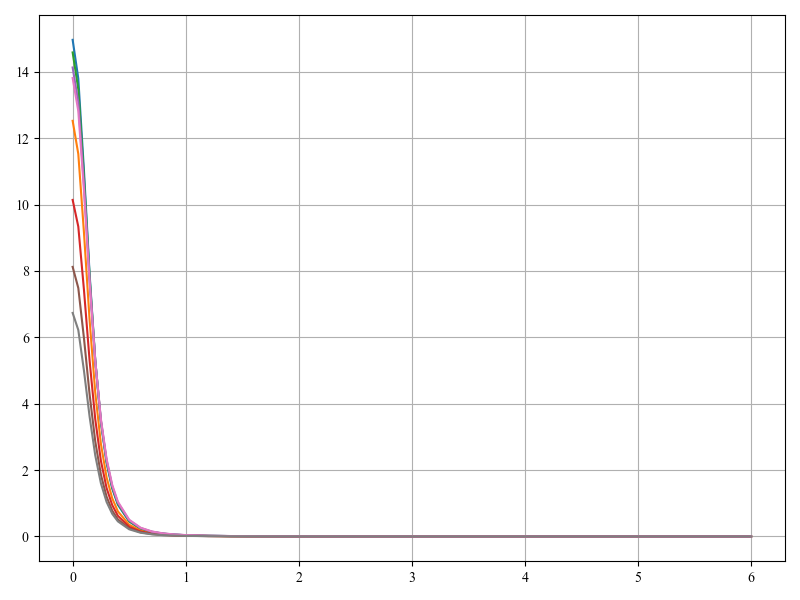

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for comp in composition:
    AF_mean = B_AF*comp[0] + C_AF*comp[1] + N_AF*comp[2] + O_AF*comp[3]
    AF_mean_square = AF_mean**2
    AF_square_mean = (B_AF*comp[0])**2 + (C_AF*comp[1])**2 + (N_AF*comp[2])**2 + (O_AF*comp[3])**2
    ax.plot(s, AF_mean_square)
    ax.plot(s, AF_square_mean)
ax.grid()
fig.tight_layout()
plt.show()